In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [153]:
df=pd.read_csv('credit_scoring.csv')

### Data Descriptions

| Variable Name                  | Description                                                                 | Type       |
|:-------------------------------|:----------------------------------------------------------------------------|:-----------|
| Default                        | Client with more than 90 days without paying their loan                     | Y/N        |
| Prct_uso_tc                    | Percentage of credit card usage in the last month                           | percentage |
| Edad                           | Age                                                                         | integer    |
| Nro_prestamo_retrasados        | Number of loans with payment delays of more than 3 months in the last 3 years | integer    |
| Prct_deuda_vs_ingresos         | Financial debt-to-income ratio                                              | percentage |
| Mto_ingreso_mensual            | Monthly income amount                                                       | real       |
| Nro_prod_financieros_deuda     | Number of loans (including vehicle or mortgage loans) and number of credit cards last year | integer |
| Nro_retraso_60dias             | Number of times the client has been over 60 days late in the last 3 years    | integer    |
| Nro_creditos_hipotecarios      | Number of mortgage loans                                                    | integer    |
| Nro_retraso_ultm3anios         | Number of payment delays over 30 days in the last 3 years                   | integer    |
| Nro_dependiente                | Number of dependents                                                        | integer    |


In [146]:
df.head(5)

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [147]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                3924
dtype: int64


In [148]:
# Separate rows with and without missing target values
impute_df = df[df['Mto_ingreso_mensual'].notnull()]
predict_df = df[df['Mto_ingreso_mensual'].isnull()]

# Define predictors (drop columns not used for prediction)
X_train = impute_df.drop(['Mto_ingreso_mensual', 'ID', 'Default'], axis=1)
y_train = impute_df['Mto_ingreso_mensual']
X_predict = predict_df.drop(['Mto_ingreso_mensual', 'ID', 'Default'], axis=1)

# Impute missing values in predictors
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' instead
X_train = imputer.fit_transform(X_train)
X_predict = imputer.transform(X_predict)

# Train the regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict missing values
predicted_values = reg.predict(X_predict)

# Fill missing values in the original DataFrame
df.loc[df['Mto_ingreso_mensual'].isnull(), 'Mto_ingreso_mensual'] = predicted_values

# Handling missing values in 'Nro_dependiente'
# Replace missing values with median
df['Nro_dependiente'].fillna(df['Nro_dependiente'].median(), inplace=True)

# Verify there are no missing values left
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 ID                            0
Default                       0
Prct_uso_tc                   0
Edad                          0
Nro_prestao_retrasados        0
Prct_deuda_vs_ingresos        0
Mto_ingreso_mensual           0
Nro_prod_financieros_deuda    0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
Nro_dependiente               0
dtype: int64


In [119]:
df.columns

Index(['ID', 'Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [149]:
df = df[df['ID'] != 65696]

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          149999 non-null  int64  
 1   Default                     149999 non-null  int64  
 2   Prct_uso_tc                 149999 non-null  float64
 3   Edad                        149999 non-null  int64  
 4   Nro_prestao_retrasados      149999 non-null  int64  
 5   Prct_deuda_vs_ingresos      149999 non-null  float64
 6   Mto_ingreso_mensual         149999 non-null  float64
 7   Nro_prod_financieros_deuda  149999 non-null  int64  
 8   Nro_retraso_60dias          149999 non-null  int64  
 9   Nro_creditos_hipotecarios   149999 non-null  int64  
 10  Nro_retraso_ultm3anios      149999 non-null  int64  
 11  Nro_dependiente             149999 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 14.9 MB


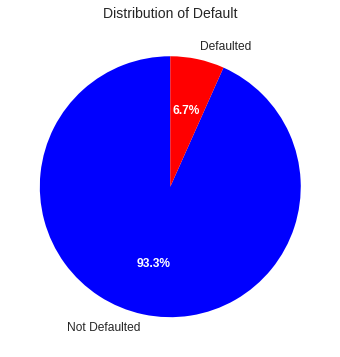

In [131]:
# Assuming you have the counts from your data
counts = [139974, 10026]  # Replace with your actual counts
labels = ['Not Defaulted', 'Defaulted']

# Define a custom function to format the percentage text
def autopct_white(pct):
    return f'{pct:.1f}%'

# Creating the pie chart with Democratic and Republican colors
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    counts, 
    labels=labels, 
    autopct=autopct_white, 
    startangle=90, 
    colors=['blue', 'red'], 
    textprops={'fontsize': 12}
)

# Set the percentage text color to white
for autotext in autotexts:
    autotext.set_fontweight('bold')  # Set bold text
    autotext.set_color('white')

plt.title("Distribution of Default", fontsize=14)
plt.savefig("Distribution of Default.png", dpi=300, bbox_inches="tight")
plt.show()

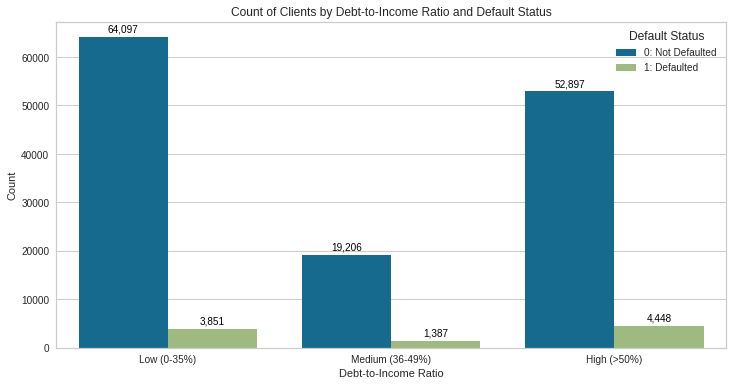

In [133]:
df['Debt_to_Income_Bin'] = pd.cut(
    df['Prct_deuda_vs_ingresos'],
    bins=[0, .35, 0.49, float('inf')],  # Realistic thresholds
    labels=['Low (0-35%)', 'Medium (36-49%)', 'High (>50%)'])
# Bar plot for Debt-to-Income Ratio by Default
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Debt_to_Income_Bin', hue='Default', data=df)
plt.title("Count of Clients by Debt-to-Income Ratio and Default Status")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Count")
for container in ax.containers:
    # Safely handle NaN values in the bar labels
    labels = [f'{int(value):,}' if not np.isnan(value) else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)
plt.legend(
    title="Default Status",
    labels=["0: Not Defaulted", "1: Defaulted"],
    loc='upper right')
plt.savefig("Debt_to_Income.jpg", dpi=300, bbox_inches="tight")
plt.show()

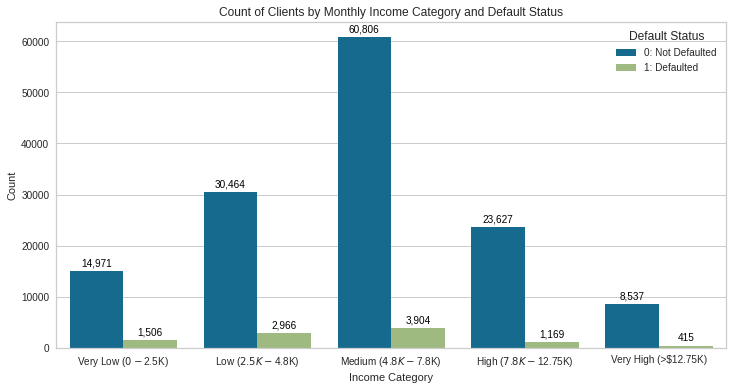

In [134]:
# Binning Monthly Income into realistic U.S.-based bins
df['Income_Category'] = pd.cut(
    df['Mto_ingreso_mensual'],
    bins = [0, 2500, 4800, 7800, 12750, float('inf')],
    labels = ['Very Low ($0-$2.5K)', 
    'Low ($2.5K-$4.8K)', 
    'Medium ($4.8K-$7.8K)', 
    'High ($7.8K-$12.75K)', 
    'Very High (>$12.75K)'])
# Bar plot for Income Category by Default
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Income_Category', hue='Default', data=df)
plt.title("Count of Clients by Monthly Income Category and Default Status")
plt.xlabel("Income Category")
plt.ylabel("Count")
# Add count labels on top of each bar with commas
for container in ax.containers:
    # Format labels with commas
    labels = [f'{int(value):,}' if not np.isnan(value) else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)
# Customizing the legend with color-coded descriptions
plt.legend(
    title="Default Status",
    labels=["0: Not Defaulted", "1: Defaulted"],
    loc='upper right')
plt.savefig("Monthly_Income_default.jpg", dpi=300, bbox_inches="tight")
plt.show()

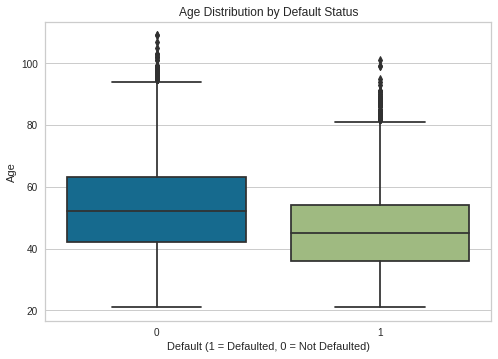

In [135]:
# Plot 3: Boxplot (Age Distribution by Default)
sns.boxplot(x='Default', y='Edad', data=df)

plt.title("Age Distribution by Default Status")
plt.xlabel("Default (1 = Defaulted, 0 = Not Defaulted)")
plt.ylabel("Age")
plt.savefig("age.jpg", dpi=300, bbox_inches="tight")
plt.show()

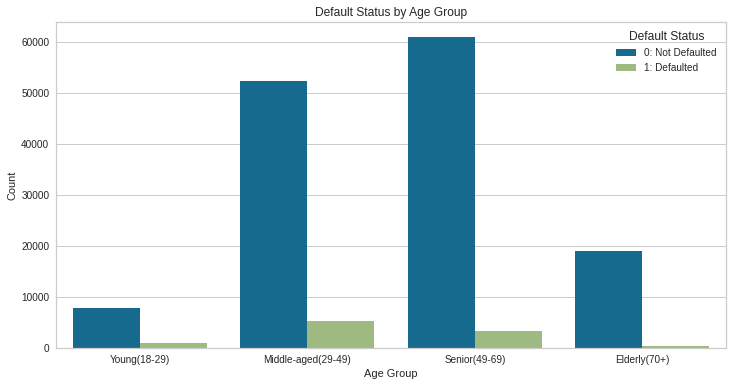

In [143]:
# Binning Age into groups
df['Age_Group'] = pd.cut(
    df['Edad'],
    bins=[18, 29, 49, 69, float('inf')], 
    labels=['Young(18-29)', 'Middle-aged(29-49)', 'Senior(49-69)', 'Elderly(70+)']
)

# Bar plot for Age Groups by Default Status
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Default', data=df)
plt.title("Default Status by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Default Status", labels=["0: Not Defaulted", "1: Defaulted"])
plt.savefig("age_group.jpg", dpi=300, bbox_inches="tight")
plt.show()

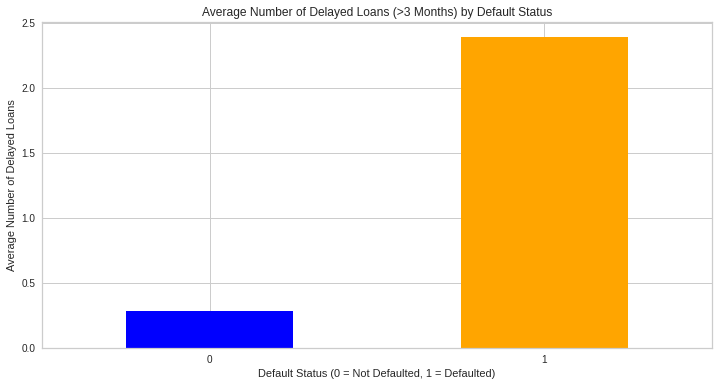

In [78]:
avg_delayed_loans = df.groupby('Default')['Nro_prestao_retrasados'].mean()

plt.figure(figsize=(12, 6))
avg_delayed_loans.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Number of Delayed Loans (>3 Months) by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Average Number of Delayed Loans")
plt.xticks(rotation=0)
plt.show()

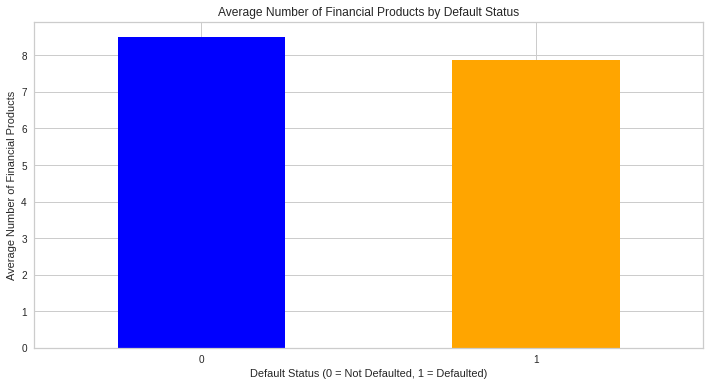

In [79]:
avg_financial_products = df.groupby('Default')['Nro_prod_financieros_deuda'].mean()

plt.figure(figsize=(12, 6))
avg_financial_products.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Number of Financial Products by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Average Number of Financial Products")
plt.xticks(rotation=0)
plt.show()

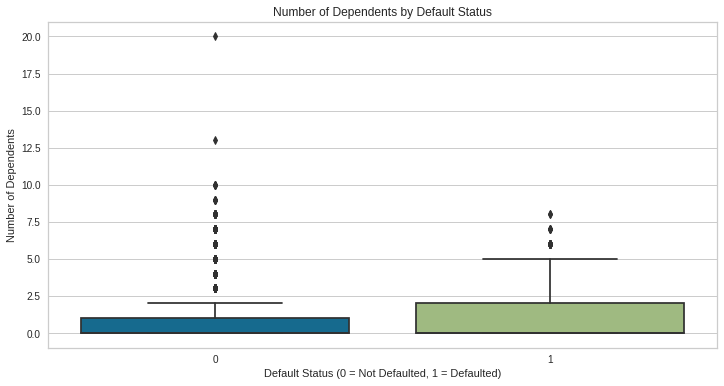

In [80]:
# Box plot for Number of Dependents by Default Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Default', y='Nro_dependiente', data=df)
plt.title("Number of Dependents by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Number of Dependents")
plt.show()
